In [64]:
import numpy as np

In [65]:
from matplotlib import pyplot as plt

plt.style.use('seaborn-whitegrid')
%config InlineBackend.figure_formats = ['svg']

В поле ответа впишите одно число. Нецелые числа следует округлить до 8 знаков после запятой.

## Задача 1

Даны значения зарплат из выборки выпускников:

100, 80, 75, 77, 89, 33, 45, 25, 65, 17, 30, 230, 24, 57, 55, 70, 75, 65, 84, 90, 150
 
Используя только встроенные питоновские функции и структуры данных (т.е. без библиотек numpy, pandas и др.), посчитайте (несмещённое) среднее квадратичное отклонение для данной выборки.

In [66]:
salary = [100, 80, 75, 77, 89, 33, 45, 25, 65, 17, 30, 230, 24, 57, 55, 70, 75, 65, 84, 90, 150]

In [67]:
length = len(salary)
length

21

In [68]:
mean_salary = sum(salary) / length
mean_salary

73.14285714285714

In [70]:
std = round((sum([(itm - mean_salary) ** 2 for itm in salary]) / (len(salary) - 1)) ** (1/2), 8)
print(f'Среднее квадратичное отклонение = {std}')

Среднее квадратичное отклонение = 47.34795214


## Задача 2

Найдите число выбросов в выборке из задачи 1. Для определения выбросов используйте методику как при построении “усов” в boxplot, однако, как и в задаче 1, пользоваться можно только встроенными функциями и структурами данных.

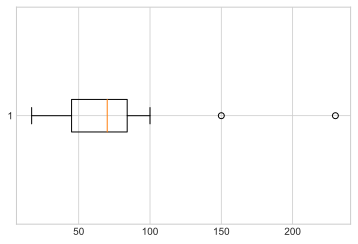

In [71]:
import matplotlib.pyplot as plt
plt.boxplot(salary, vert=False)
plt.show()

In [94]:
sort = sorted(salary)

In [73]:
q1 = sort[length // 4]
q1

45

In [82]:
q3 = sort[3 * length // 4]
q3

84

In [75]:
iqr = q3 - q1

boxplot_range = (q1 - 1.5 * iqr, q3 + 1.5 * iqr)
boxplot_range

(-13.5, 142.5)

In [76]:
outlier = len([x for x in salary if x < boxplot_range[0] or x > boxplot_range[1]])
print(f'Количество выбросов = {outlier}')

Количество выбросов = 2


## Задача 3

В университет на факультет A поступило 100 человек, на факультет B - 90 человек и на факультет C - 45 человек. Вероятность того, что студент с факультета A сдаст первую сессию, равна 0.6. Для студента с факультета B эта вероятность равна 0.7, а для студента с факультета C - 0.8. Случайным образом выбирается студент, сдавший первую сессию. Какое событие наиболее вероятно:

- студент учится на факультете A,
- студент учится на факультете B,
- студент учится на факультете C?

Вероятность искомого события:
$$P(A\:|+) = \frac{P(+|\:A) \cdot P(A)}{P(+)}$$
$$P(B\:|+) = \frac{P(+|\:B) \cdot P(B)}{P(+)}$$
$$P(C\:|+) = \frac{P(+|\:C) \cdot P(C)}{P(+)}$$

Вероятность, что студент будет с i-го факультета:
$$P(A) = \frac{100}{235}$$
$$P(B) = \frac{90}{235}$$
$$P(C) = \frac{45}{235}$$

Вероятности сдать сессию для студента с каждого факультета:

$$P(+|\:A) = 0.6$$
$$P(+|\:B) = 0.7$$
$$P(+|\:C) = 0.8$$

Общая вероятность сдать сессию:
$$P(+) = P(A) \cdot P(+ | A) + P(B) \cdot P(+ | B) + P(C) \cdot P(+ | C)$$

In [77]:
students = np.array([100, 90, 45])
students

array([100,  90,  45])

In [78]:
p_i = students / students.sum()
p_i

array([0.42553191, 0.38297872, 0.19148936])

In [79]:
p_pl_i = np.array([0.6, 0.7, 0.8])
p_pl_i

array([0.6, 0.7, 0.8])

In [80]:
p_pl = (p_i * p_pl_i).sum()
p_pl

0.676595744680851

In [81]:
p_i_pl = p_pl_i * p_i / p_pl
p_i_pl

array([0.37735849, 0.39622642, 0.22641509])

Наиболее вероятно, что студент учится на факультете B